A notebook to demo how we can look at evolution of eigenvectors over a CoCo-MD simulation.

Franklin: I couln't use your data for this, the file nees to be corrupted. Also, very annoyingly, having said this would be easy to do using Fasus/Cofasus, the code seems to be playing up. 
So therefote in this notebook a) the example is from old simulations of alanine pentapeptide, so you will need to edit it straight away before you can use it and b) I am using MDTraj to load and process the trajectories. This works because the fromtrajectory() method of pca accepts both Cofasus and MDTraj trajectories as alternatives.

In [15]:
# Set-up
import mdtraj as mdt
from MDPlus.analysis import pca
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
# Create a list of md files to be analysed
mdfile_template = 'ncfiles/cycle{:03d}rep{:03d}.dcd'
topfile = 'repres1.pdb'
selection = 'name CA'
n_cycles = 30
n_reps = 10
md_list = []
for cycle in range(n_cycles):
    for rep in range(n_reps):
        md_list.append(mdfile_template.format(cycle,rep))

In [17]:
# Load the whole set of trajectories
total_traj = mdt.load(md_list, top=topfile)

In [18]:
#cut them down to just the interesting atoms - a little more complex when you use mdtraj instead of Fasu/Cofasu
ref = mdt.load(topfile)
sel = ref.topology.select('name CA')
total_traj.topology = total_traj.topology.subset(sel)
total_traj.xyz = total_traj.xyz[:, sel]

In [19]:
#Do pca on all the structures up to each cycle (like CoCo does), enforce 3 eigenvectors to be output
n_vecs = 3
pca_list = []
for cycle in range(n_cycles):
    istart = 0
    iend = (cycle + 1) * n_reps
    pca_list.append(pca.fromtrajectory(total_traj[istart:iend], req_evecs=n_vecs))

In [20]:
# Create a list of root-mean-square inner products, each calculated from two sequential pca runs
rmsip = []
for i in range(len(pca_list) - 1):
    dp_matrix = np.dot(pca_list[i].evecs, pca_list[i+1].evecs.T)
    rmsip.append(np.sqrt((dp_matrix * dp_matrix).mean()))

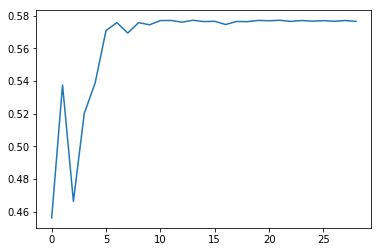

In [21]:
# Now pllot it. See how the rmsip values plateau as the simulation progresses - the directions of exploration become fixed.
plt.plot(rmsip)